# Exploratory Data Analysis (EDA)

### Obsah<a class='anchor' id='top'></a>
* [Dataset so syntetickými dátami](#Syntheticdatadataset)
    * [Chýbajúce hodnoty, dátové typy, duplikáty a deskriptívna štatistika](#1)
    * [Vizualizácia dát](#2)
    * [Záver](#3)
    * [Korelácia](#4)
* [Dataset s reálnymi dátami](#Realdatadataset)
    * [Chýbajúce hodnoty, dátové typy, duplikáty a deskriptívna štatistika](#5)
    * [Vizualizácia dát](#6)
    * [Záver](#8)
    * [Predspracovanie dát](#7)

* [Výber metrík](#feature_selecion)
* [Záver](#Záver)
* [Referencie](#Referencie)


In [126]:
import json
import math
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Ignore warnings
warnings.filterwarnings("ignore")

## Dataset zo syntetickej premávky <a class="anchor" id="Syntheticdatadataset"></a>

In [127]:
data = pd.read_csv("../datasets/simulated_network_data.csv")
data.head()

timestamp  amf_session_value  bearers_active_value  \
0  2025-04-11 14:41:57                4.0                   4.0   
1  2025-04-11 14:41:58                4.0                   4.0   
2  2025-04-11 14:41:59                4.0                   4.0   
3  2025-04-11 14:42:00                4.0                   4.0   
4  2025-04-11 14:42:01                4.0                   4.0   

   fivegs_amffunction_amf_authreject_value  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   fivegs_amffunction_amf_authreq_value  \
0                                   4.0   
1                                   4.0   
2                                   4.0   
3                                   4.0   
4                                   4.0   

   fivegs_amffunction_mm_confupdate_value  \
0                                     4.0   
1                                     4.0   
2                                     4.0   
3                                     4.0   
4                                     4.0   

   fivegs_amffunction_mm_confupdatesucc_value  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   fivegs_amffunction_mm_paging5greq_value  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   fivegs_amffunction_mm_paging5gsucc_value  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   fivegs_amffunction_rm_regemergreq_value  ...  \
0                                      0.0  ...   
1                                      0.0  ...   
2                                      0.0  ...   
3                                      0.0  ...   
4                                      0.0  ...   

   process_resident_memory_bytes_value  process_start_time_seconds_value  \
0                           52657356.8                      3.644742e+08   
1                           52657356.8                      3.644742e+08   
2                           52657356.8                      3.644742e+08   
3                           52657356.8                      3.644742e+08   
4                           52657356.8                      3.644742e+08   

   process_virtual_memory_bytes_value  process_virtual_memory_max_bytes_value  \
0                        1.151508e+09                                    -1.0   
1                        1.151508e+09                                    -1.0   
2                        1.151508e+09                                    -1.0   
3                        1.151508e+09                                    -1.0   
4                        1.151508e+09                                    -1.0   

   ran_ue_value  s5c_rx_createsession_value  s5c_rx_parse_failed_value  \
0           0.0                         0.0                        0.0   
1           0.0                         0.0                        0.0   
2           0.0                         0.0                        0.0   
3           0.0                         0.0                        0.0   
4           0.0                         0.0                        0.0   

   application  log_type  current_uc  
0            0         0         uc6  
1            0         0         uc6  
2            0         0         uc6  
3            0         0         uc6  
4            0         0         uc6  

[5 rows x 58 colu

#### Chýbajúce hodnoty, Dátové typy, Duplikáty a Deskriptívna štatistika <a class="anchor" id="1"></a>

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43791 entries, 0 to 43790
Data columns (total 58 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   timestamp                                           43791 non-null  object 
 1   amf_session_value                                   43791 non-null  float64
 2   bearers_active_value                                43791 non-null  float64
 3   fivegs_amffunction_amf_authreject_value             43791 non-null  float64
 4   fivegs_amffunction_amf_authreq_value                43791 non-null  float64
 5   fivegs_amffunction_mm_confupdate_value              43791 non-null  float64
 6   fivegs_amffunction_mm_confupdatesucc_value          43791 non-null  float64
 7   fivegs_amffunction_mm_paging5greq_value             43791 non-null  float64
 8   fivegs_amffunction_mm_paging5gsucc_value            43791 non-null  float64


In [129]:
data.describe(include='all')

timestamp  amf_session_value  bearers_active_value  \
count                 43791       43791.000000          43791.000000   
unique                29749                NaN                   NaN   
top     2025-04-11 19:28:55                NaN                   NaN   
freq                    140                NaN                   NaN   
mean                    NaN           3.925715              3.919938   
std                     NaN           0.428739              0.435187   
min                     NaN           0.000000              0.000000   
25%                     NaN           4.000000              4.000000   
50%                     NaN           4.000000              4.000000   
75%                     NaN           4.000000              4.000000   
max                     NaN           4.000000              4.000000   

        fivegs_amffunction_amf_authreject_value  \
count                                   43791.0   
unique                                      NaN   
top                                         NaN   
freq                                        NaN   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

        fivegs_amffunction_amf_authreq_value  \
count                           43791.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                              104.852207   
std                                64.203809   
min                                 2.000000   
25%                                39.000000   
50%                               113.000000   
75%                               159.000000   
max                               204.000000   

        fivegs_amffunction_mm_confupdate_value  \
count                             43791.000000   
unique                                     NaN   
top                                        NaN   
freq                                       NaN   
mean                                104.833801   
std                                  64.197099   
min                                   2.000000   
25%                                  38.000000   
50%                                 113.000000   
75%                                 159.000000   
max                                 204.000000   

        fivegs_amffunction_mm_confupdatesucc_value  \
count                                      43791.0   
unique                                         NaN   
top                                            NaN   
freq                                           NaN   
mean                                           0.0   
std                                            0.0   
min                                            0.0   
25%                                            0.0   
50%                                            0.0   
75%                                            0.0   
max                                            0.0   

        fivegs_amffunction_mm_paging5greq_value  \
count                                   43791.0   
unique                                      NaN   
top                                         NaN   
freq                                        NaN   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

        fivegs_amffunction_mm_paging5gsucc_value  \
count                                    43791.0

In [130]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [131]:
data.isnull().sum() / len(data) * 100

timestamp                                             0.0
amf_session_value                                     0.0
bearers_active_value                                  0.0
fivegs_amffunction_amf_authreject_value               0.0
fivegs_amffunction_amf_authreq_value                  0.0
fivegs_amffunction_mm_confupdate_value                0.0
fivegs_amffunction_mm_confupdatesucc_value            0.0
fivegs_amffunction_mm_paging5greq_value               0.0
fivegs_amffunction_mm_paging5gsucc_value              0.0
fivegs_amffunction_rm_regemergreq_value               0.0
fivegs_amffunction_rm_regemergsucc_value              0.0
fivegs_amffunction_rm_reginitreq_value                0.0
fivegs_amffunction_rm_reginitsucc_value               0.0
fivegs_amffunction_rm_registeredsubnbr_value          0.0
fivegs_amffunction_rm_regmobreq_value                 0.0
fivegs_amffunction_rm_regmobsucc_value                0.0
fivegs_amffunction_rm_regperiodreq_value              0.0
fivegs_amffunc

<div class="alert alert-block alert-warning">
<b>Chýbajúce hodnoty:</b> Chýbajúce hodnoty v dátach. Je potrebné ich spracovať pred použitím pri ML.
</div>

In [132]:
data.nunique()[data.nunique() > 1].apply(lambda x: f"{x:<50}{data.nunique()[data.nunique() > 1].index[data.nunique()[data.nunique() > 1] == x][0]}")

timestamp                                             29749                                         ...
amf_session_value                                     5                                             ...
bearers_active_value                                  5                                             ...
fivegs_amffunction_amf_authreq_value                  203                                           ...
fivegs_amffunction_mm_confupdate_value                198                                           ...
fivegs_amffunction_rm_reginitreq_value                227                                           ...
fivegs_amffunction_rm_reginitsucc_value               198                                           ...
fivegs_amffunction_rm_registeredsubnbr_value          5                                             ...
fivegs_pcffunction_pa_policyamassoreq_value           202                                           ...
fivegs_pcffunction_pa_policyamassosucc_value          202       

In [133]:
data.duplicated().sum()

np.int64(9728)

<div class="alert alert-block alert-warning">
<b>Duplikáty:</b> Duplikáty v dátach znamenajú, že stav sa medzi jednotlivými meraniami nezmenil.
</div>

#### Záver <a class="anchor" id="3"></a>
Čo treba zodpovedať:
1. Chýbajúce hodnoty: 
   - Koľko chýbajúcich hodnôt je v každom stĺpci?
      - žiadne chýbajúce hodnoty

2. Dátové typy:
   - Aké sú dátové typy každého stĺpca?
      - timestamp                                              object
      - application                                            object
      - log_type                                               object
      - current_uc                                             object
      - Ostatné stĺpce sú float64
   - Ako konvertovať dátové typy?
      - Map the columns to the correct data types using the `astype()` method
      - Použite `astype()` na konverziu stĺpcov na správne dátové typy.

3. Duplikáty:
   - Aké sú duplicitné stĺpce v datasete?
      - Viacero riadkov má iba jednu hodnotu, môžeme tieto stĺpce odstrániť.
   - Koľko duplicitných riadkov je v datasete?
      - 9728
   - Ako odstrániť duplikáty?
      - Používame časové údaje, takže duplikáty znamenajú, že sa stav nezmenil.


#### Príprava dát

In [134]:
# Remove the columns with only one unique value
data = data.loc[:, data.nunique() > 1]

In [135]:
# Missing values imputation
data.fillna(data.mode().iloc[0], inplace=True)
# Check for missing values again
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

<div class="alert alert-block alert-success">
<b>Dáta:</b> Odstránené stĺpce, ktoré nie sú potrebné pre analýzu. Chýbajúce hodnoty boli nahradené módom stĺpca.
</div>

In [136]:
# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Map string values to numerical values
with open('./json/log_map.json', 'r') as f:
    LOG_MAP = json.load(f)

with open('./json/app_map.json', 'r') as f:
    APP_MAP = json.load(f)

with open('./json/uc_map.json', 'r') as f:
    UC_MAP = json.load(f)

data['application'] = data['application'].map(APP_MAP)
data['log_type'] = data['log_type'].map(LOG_MAP)
data['current_uc'] = data['current_uc'].map(UC_MAP)

# Check if the values were correctly mapped
data.dtypes

timestamp                                             datetime64[ns]
amf_session_value                                            float64
bearers_active_value                                         float64
fivegs_amffunction_amf_authreq_value                         float64
fivegs_amffunction_mm_confupdate_value                       float64
fivegs_amffunction_rm_reginitreq_value                       float64
fivegs_amffunction_rm_reginitsucc_value                      float64
fivegs_amffunction_rm_registeredsubnbr_value                 float64
fivegs_pcffunction_pa_policyamassoreq_value                  float64
fivegs_pcffunction_pa_policyamassosucc_value                 float64
fivegs_pcffunction_pa_policysmassoreq_value                  float64
fivegs_pcffunction_pa_policysmassosucc_value                 float64
fivegs_pcffunction_pa_sessionnbr_value                       float64
fivegs_smffunction_sm_pdusessioncreationreq_value            float64
fivegs_smffunction_sm_pdusessioncr

<div class="alert alert-block alert-success">
<b>Dátové typy:</b> Všetky stĺpce boli konvertované na správne dátové typy ('float64', 'int64', 'datetime64[ns]').
</div>

#### Analýza jednotlivých stĺpcov <a class="anchor" id="2"></a>

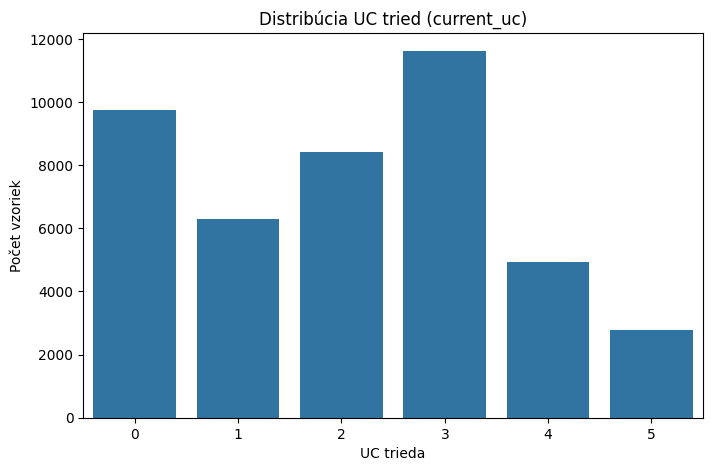

In [137]:
plt.figure(figsize=(8,5))
sns.countplot(x='current_uc', data=data)
plt.title("Distribúcia UC tried (current_uc)")
plt.xlabel("UC trieda")
plt.ylabel("Počet vzoriek")
plt.show()

<div class="alert alert-block alert-warning">
<b>Rozdelenie UC:</b> Treba brať do úvahy, že niektoré používateľské prípady (UC) sa v datasete vyskytujú častejšie ako iné.
</div>

In [138]:
# Class weights for imbalanced classes
classes = np.unique(data['current_uc'].dropna())
weights = compute_class_weight(class_weight='balanced', classes=classes, y=data['current_uc'].dropna())
class_weights = dict(zip(classes, weights))
print("Class weights:", class_weights)

Class weights: {np.int64(0): np.float64(0.7493326488706366), np.int64(1): np.float64(1.159228081321474), np.int64(2): np.float64(0.8667022918893243), np.int64(3): np.float64(0.6281521645580515), np.int64(4): np.float64(1.4750404203718674), np.int64(5): np.float64(2.637694253704373)}


In [139]:
# Save class weights to JSON
class_weights_serializable = {int(k): float(v) for k, v in class_weights.items()}
with open('./json/class_weights.json', 'w') as f:
    json.dump(class_weights_serializable, f)

<div class="alert alert-block alert-success">
<b>Rozdelenie UC:</b> Tento problém je možné vyriešiť pomocou váženého priemeru.
</div>

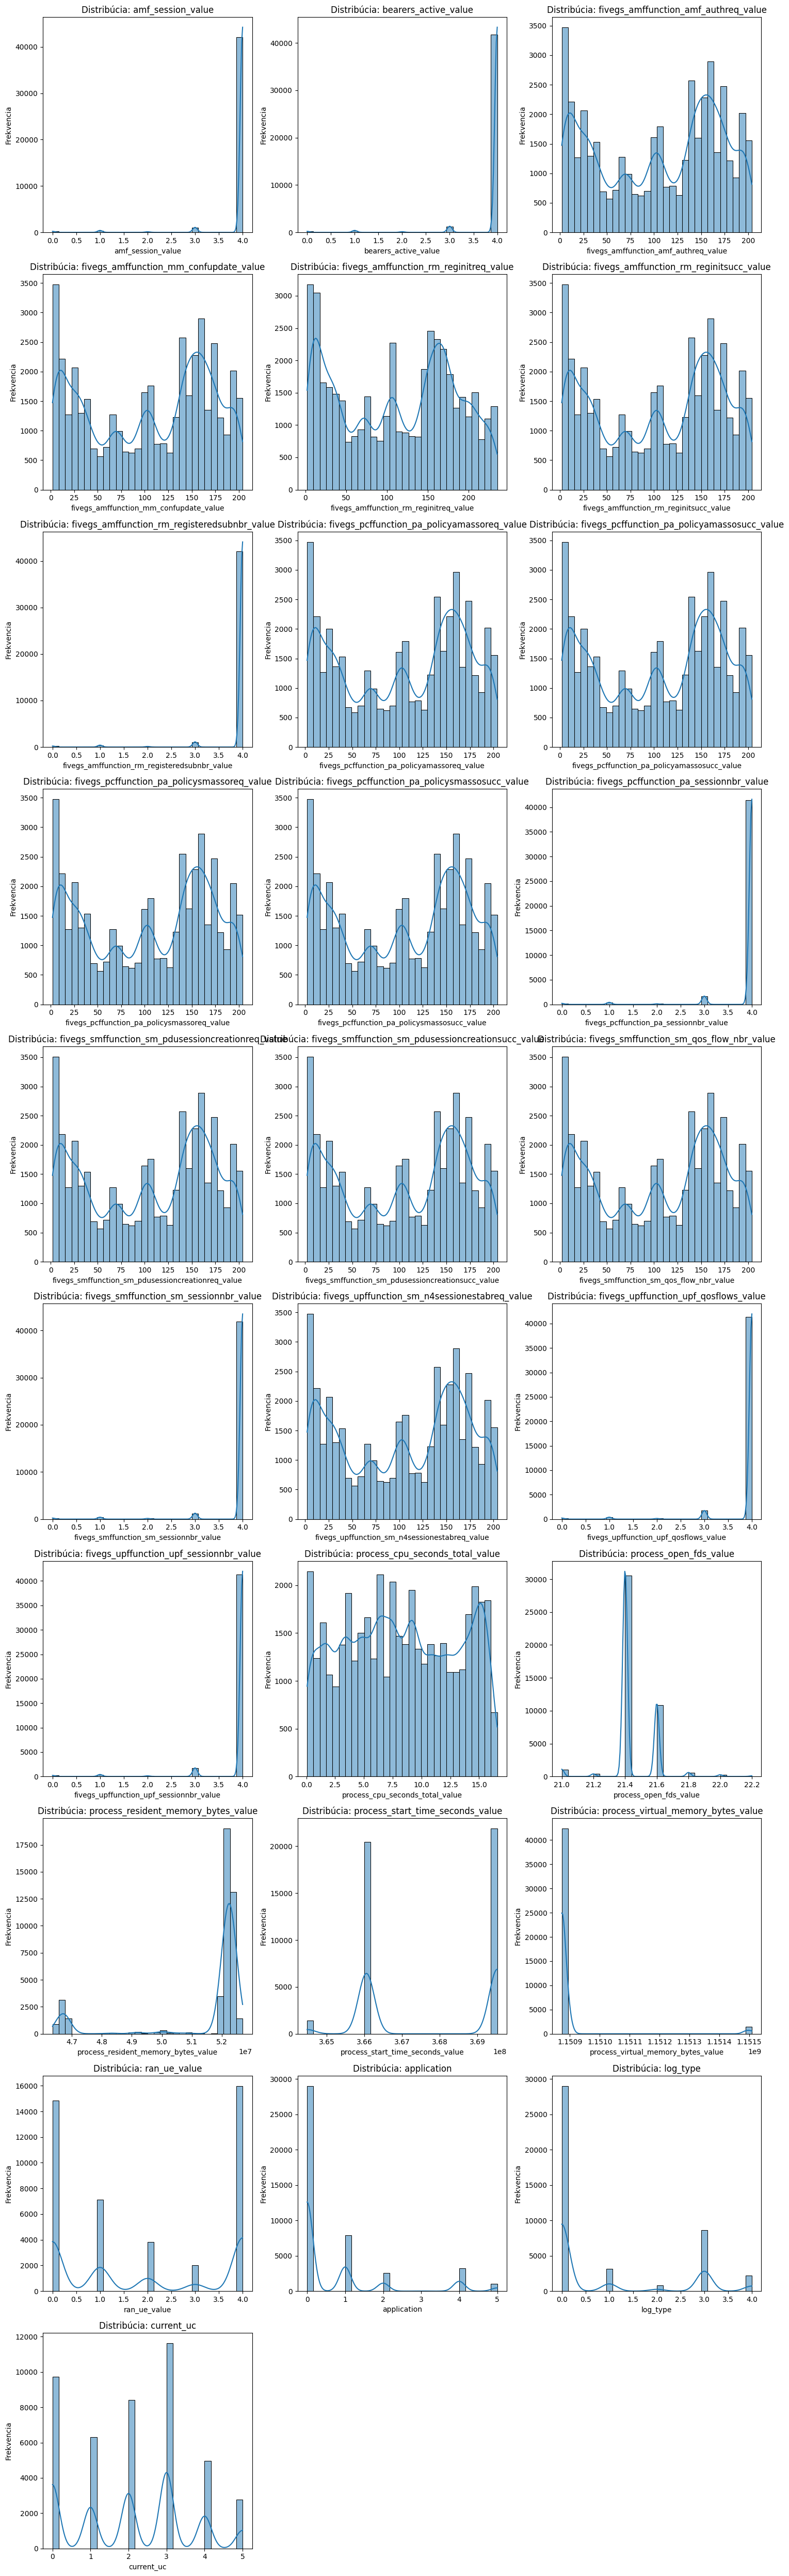

In [140]:
# Select numerical columns for feature selection
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))


axes = axes.flatten()

for i, col in enumerate(numerical_cols):
  # Histogram
  sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
  axes[i].set_title(f'Distribúcia: {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frekvencia')

# Remove empty axes
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


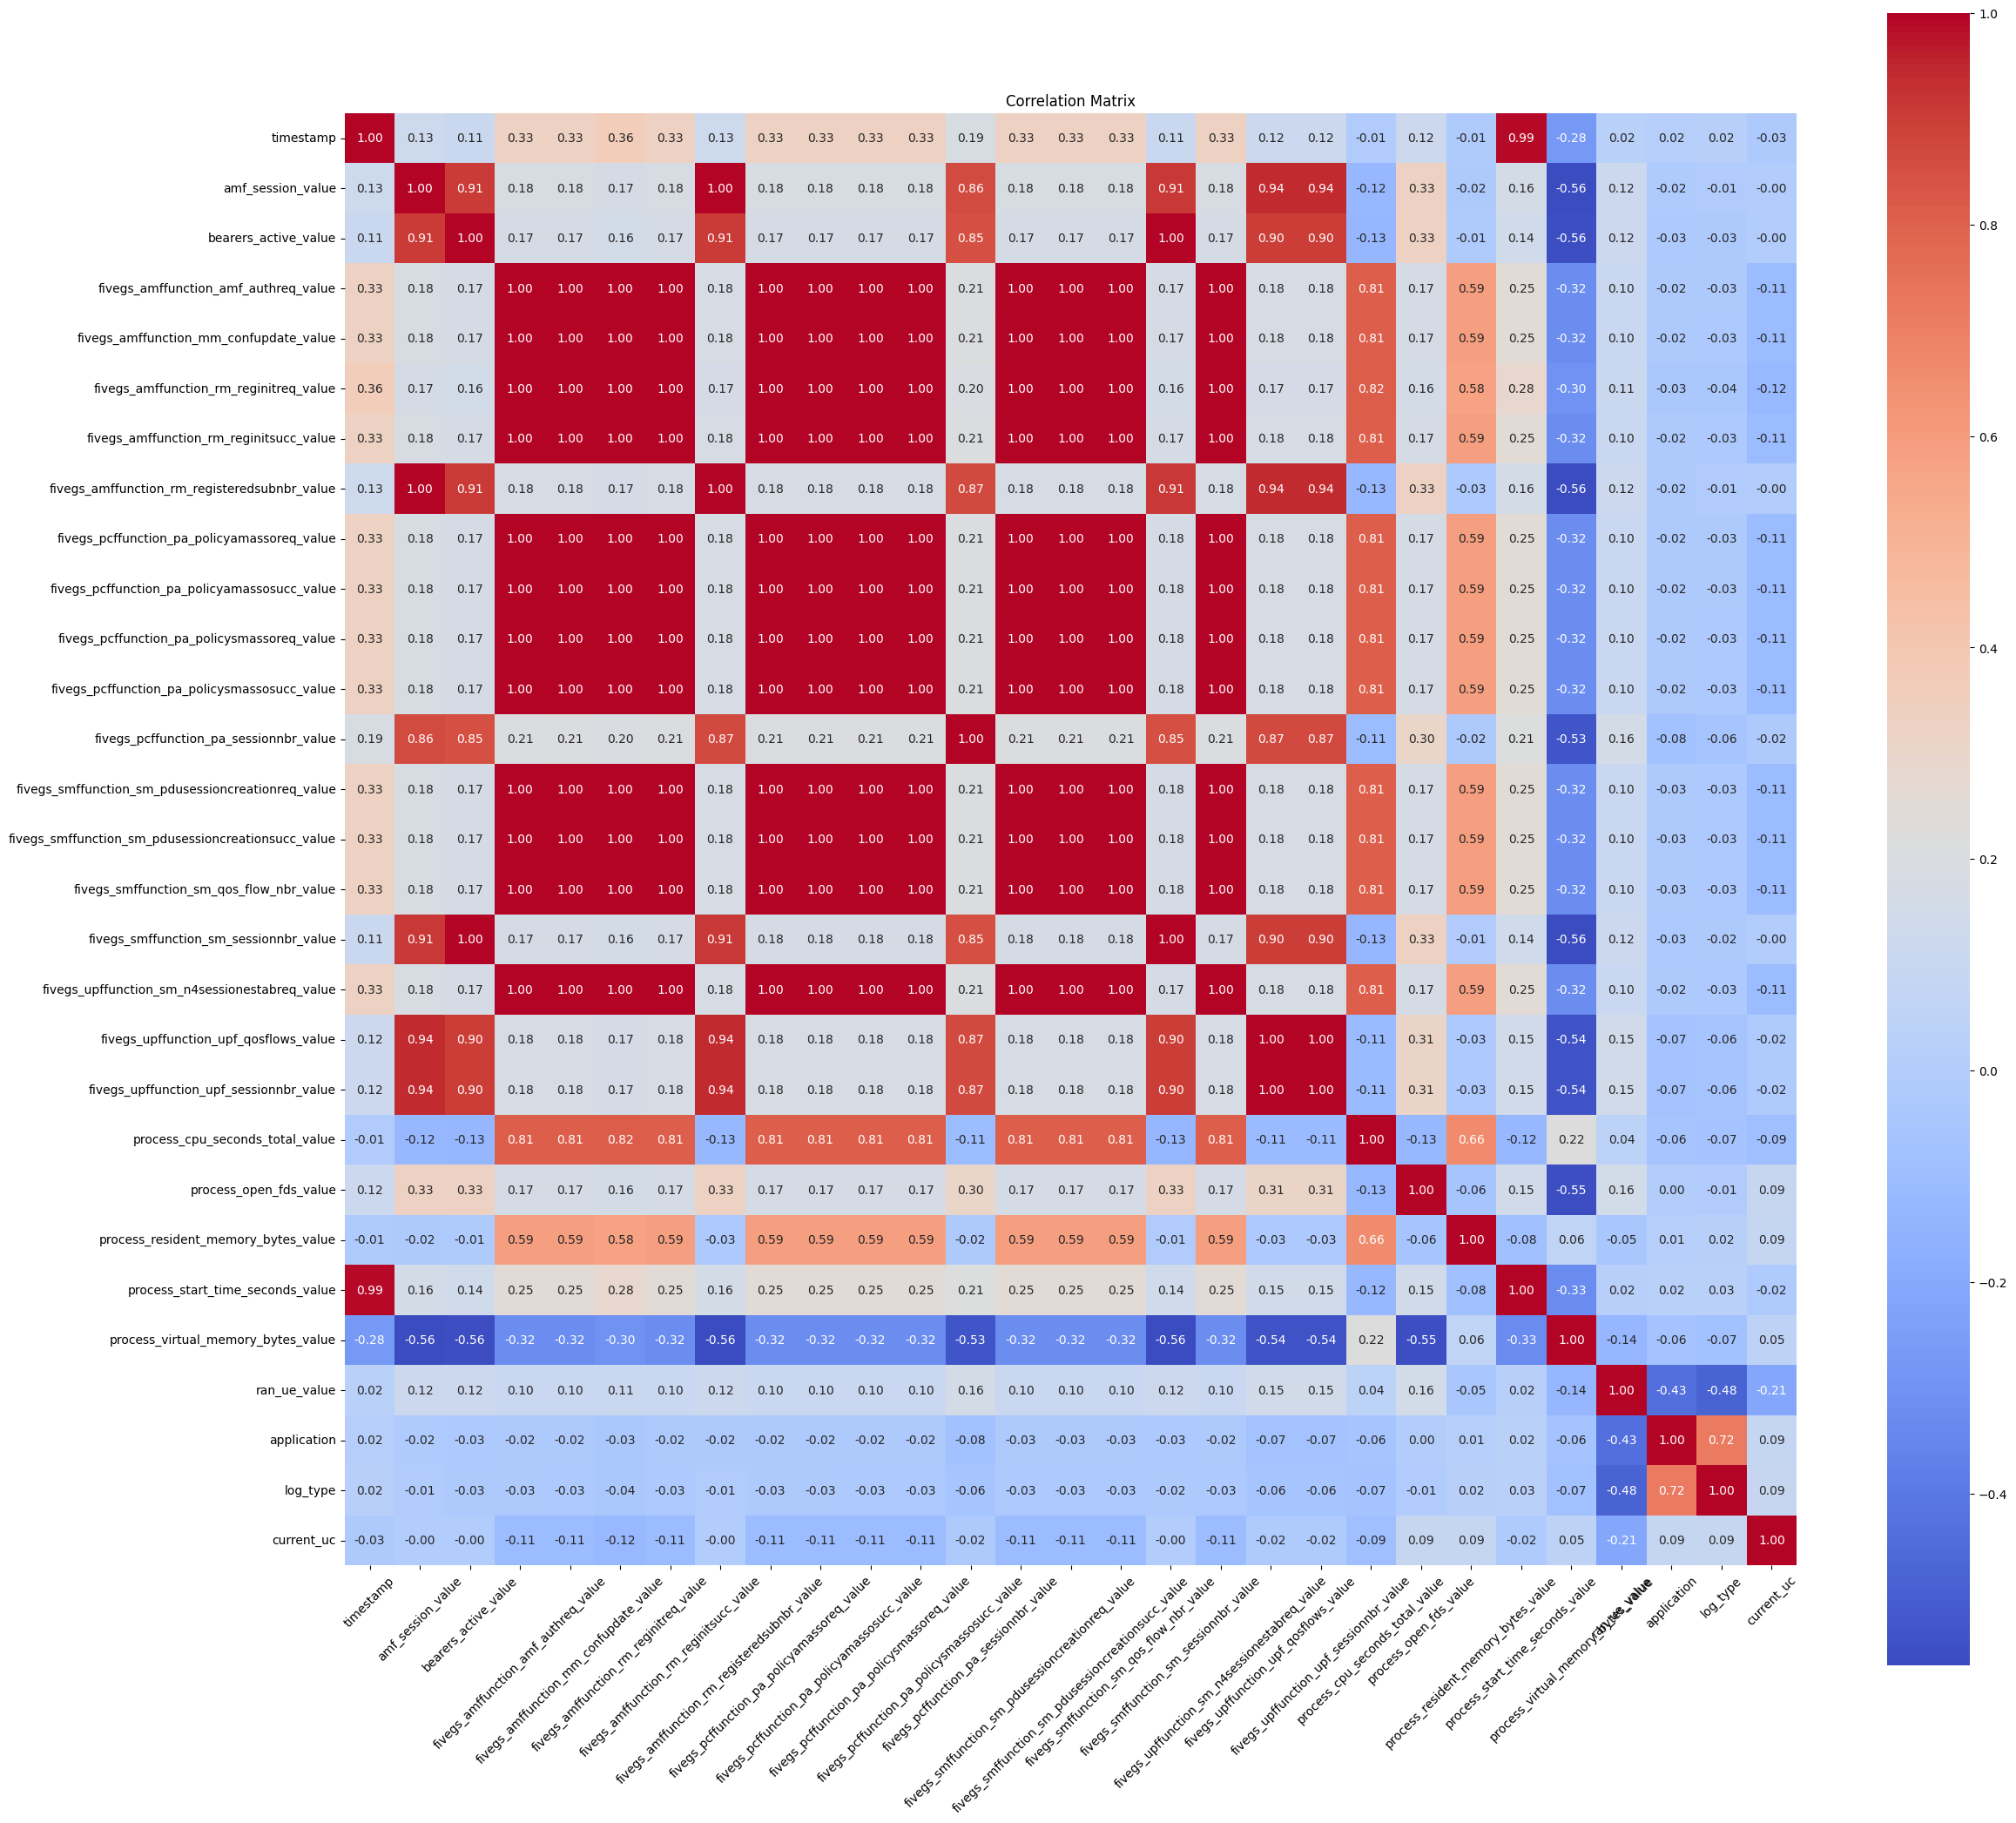

In [141]:
# Correlation matrix
corr = data.corr()


plt.figure(figsize=(25, 25))
plt.title("Correlation Matrix")

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Korelácia:</b> Žiadna metrika nemá silnú koreláciu s UC triedou, ktorú budeme klasifikovať.
</div>

## Dataset z reálnej premávky <a class="anchor" id="Realdatadataset"></a>

In [142]:
real_data = pd.read_csv("../datasets/real_network_data_after_labeling.csv")
real_data.head()

timestamp  amf_session_value  bearers_active_value  \
0  2025-04-10 12:28:14                2.0                   2.0   
1  2025-04-10 12:28:15                2.0                   2.0   
2  2025-04-10 12:28:16                2.0                   2.0   
3  2025-04-10 12:28:17                2.0                   2.0   
4  2025-04-10 12:28:18                2.0                   2.0   

   fivegs_amffunction_amf_authreject_value  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   fivegs_amffunction_amf_authreq_value  \
0                                  10.0   
1                                  10.0   
2                                  10.0   
3                                  10.0   
4                                  10.0   

   fivegs_amffunction_mm_confupdate_value  \
0                                   599.0   
1                                   599.0   
2                                   599.0   
3                                   599.0   
4                                   599.0   

   fivegs_amffunction_mm_confupdatesucc_value  \
0                                       499.0   
1                                       499.0   
2                                       499.0   
3                                       499.0   
4                                       499.0   

   fivegs_amffunction_mm_paging5greq_value  \
0                                   1034.0   
1                                   1034.0   
2                                   1034.0   
3                                   1034.0   
4                                   1034.0   

   fivegs_amffunction_mm_paging5gsucc_value  \
0                                     498.0   
1                                     498.0   
2                                     498.0   
3                                     498.0   
4                                     498.0   

   fivegs_amffunction_rm_regemergreq_value  ...  \
0                                      0.0  ...   
1                                      0.0  ...   
2                                      0.0  ...   
3                                      0.0  ...   
4                                      0.0  ...   

   process_resident_memory_bytes_value  process_start_time_seconds_value  \
0                           50106368.0                       118464611.5   
1                           50106368.0                       118464611.5   
2                           50106368.0                       118464611.5   
3                           50106368.0                       118464611.5   
4                           50106368.0                       118464611.5   

   process_virtual_memory_bytes_value  process_virtual_memory_max_bytes_value  \
0                        1.404078e+09                                    -1.0   
1                        1.404078e+09                                    -1.0   
2                        1.404078e+09                                    -1.0   
3                        1.404078e+09                                    -1.0   
4                        1.404078e+09                                    -1.0   

   ran_ue_value  s5c_rx_createsession_value  s5c_rx_parse_failed_value  \
0           0.0                         0.0                        0.0   
1           0.0                         0.0                        0.0   
2           0.0                         0.0                        0.0   
3           0.0                         0.0                        0.0   
4           0.0                         0.0                        0.0   

   application  log_type  current_uc  
0            0         0         uc1  
1            0         0         uc1  
2            0         0         uc1  
3            0         0         uc1  
4            0         0         uc1  

[5 rows x 58 colu

#### Chýbajúce hodnoty, Dátové typy, Duplikáty a Deskriptívna štatistika <a class="anchor" id="5"></a>

In [143]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6785 entries, 0 to 6784
Data columns (total 58 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   timestamp                                           6785 non-null   object 
 1   amf_session_value                                   6785 non-null   float64
 2   bearers_active_value                                6785 non-null   float64
 3   fivegs_amffunction_amf_authreject_value             6785 non-null   float64
 4   fivegs_amffunction_amf_authreq_value                6785 non-null   float64
 5   fivegs_amffunction_mm_confupdate_value              6785 non-null   float64
 6   fivegs_amffunction_mm_confupdatesucc_value          6785 non-null   float64
 7   fivegs_amffunction_mm_paging5greq_value             6785 non-null   float64
 8   fivegs_amffunction_mm_paging5gsucc_value            6785 non-null   float64
 9

In [144]:
real_data.describe(include='all')

timestamp  amf_session_value  bearers_active_value  \
count                  6785        6785.000000           6785.000000   
unique                 5084                NaN                   NaN   
top     2025-04-10 13:20:34                NaN                   NaN   
freq                      9                NaN                   NaN   
mean                    NaN           2.791452              2.766839   
std                     NaN           1.494975              1.526840   
min                     NaN           0.000000              0.000000   
25%                     NaN           1.000000              1.000000   
50%                     NaN           4.000000              4.000000   
75%                     NaN           4.000000              4.000000   
max                     NaN           4.000000              4.000000   

        fivegs_amffunction_amf_authreject_value  \
count                                    6785.0   
unique                                      NaN   
top                                         NaN   
freq                                        NaN   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

        fivegs_amffunction_amf_authreq_value  \
count                            6785.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                               12.206338   
std                                 2.765957   
min                                 0.000000   
25%                                12.000000   
50%                                12.000000   
75%                                12.000000   
max                                15.000000   

        fivegs_amffunction_mm_confupdate_value  \
count                              6785.000000   
unique                                     NaN   
top                                        NaN   
freq                                       NaN   
mean                                734.754901   
std                                 282.378079   
min                                   0.000000   
25%                                 618.000000   
50%                                 633.000000   
75%                                 640.000000   
max                                1211.000000   

        fivegs_amffunction_mm_confupdatesucc_value  \
count                                  6785.000000   
unique                                         NaN   
top                                            NaN   
freq                                           NaN   
mean                                    531.113780   
std                                     125.164509   
min                                       0.000000   
25%                                     506.000000   
50%                                     521.000000   
75%                                     527.000000   
max                                     671.000000   

        fivegs_amffunction_mm_paging5greq_value  \
count                               6785.000000   
unique                                      NaN   
top                                         NaN   
freq                                        NaN   
mean                                1096.827119   
std                                  256.344911   
min                                    0.000000   
25%                                 1048.000000   
50%                                 1078.000000   
75%                                 1090.000000   
max                                 1378.000000   

        fivegs_amffunction_mm_paging5gsucc_value  \
count                                6785.000000

In [145]:
real_data.isnull().sum()[real_data.isnull().sum() > 0]

Series([], dtype: int64)

In [146]:
real_data.nunique()[real_data.nunique() > 1].apply(lambda x: f"{x:<50}{real_data.nunique()[real_data.nunique() > 1].index[real_data.nunique()[real_data.nunique() > 1] == x][0]}")

timestamp                                             5084                                          ...
amf_session_value                                     5                                             ...
bearers_active_value                                  5                                             ...
fivegs_amffunction_amf_authreq_value                  4                                             ...
fivegs_amffunction_mm_confupdate_value                31                                            ...
fivegs_amffunction_mm_confupdatesucc_value            27                                            ...
fivegs_amffunction_mm_paging5greq_value               27                                            ...
fivegs_amffunction_mm_paging5gsucc_value              26                                            ...
fivegs_amffunction_rm_reginitreq_value                9                                             ...
fivegs_amffunction_rm_reginitsucc_value               5         

In [147]:
duplicates = real_data.duplicated()
duplicates_sum = duplicates.sum()
print(f"Total duplicates: {duplicates_sum}")

Total duplicates: 0


<div class="alert alert-block alert-info">
<b>Dáta:</b> V reálnych dátach sa nevyskytujú žiadne chýbajúce hodnoty ani duplikáty.
</div>

#### Záver <a class="anchor" id="8"></a>
Čo treba zodpovedať:
1. Chýbajúce hodnoty: 
   - Koľko chýbajúcich hodnôt je v každom stĺpci?
      - Žiadne chýbajúce hodnoty

2. Dátové typy:
   - Aké sú dátové typy každého stĺpca?
      - timestamp                                              object
      - application                                            object
      - log_type                                               object
      - current_uc                                             object
      - Ostatné stĺpce sú float64
   - Ako konvertovať dátové typy?
      - Map the columns to the correct data types using the `astype()` method
      - Použite `astype()` na konverziu stĺpcov na správne dátové typy.

3. Duplikáty:
   - Aké sú duplicitné stĺpce v datasete?
      - V datasete nie sú žiadne duplicitné stĺpce. 
    - Koľko duplicitných riadkov je v datasete?
      - 0

#### Príprava dát <a class="anchor" id="7"></a>

In [148]:
# Remove columns with only one unique value
real_data = real_data.loc[:, real_data.nunique() > 1]

In [149]:
# Missing values imputation
real_data.fillna(real_data.mode().iloc[0], inplace=True)

# Check for missing values again
real_data.isnull().sum()[real_data.isnull().sum() > 0]

Series([], dtype: int64)

In [150]:
# Convert timestamp to datetime
real_data['timestamp'] = pd.to_datetime(real_data['timestamp'])

real_data['application'] = real_data['application'].map(APP_MAP)
real_data['log_type'] = real_data['log_type'].map(LOG_MAP)
real_data['current_uc'] = real_data['current_uc'].map(UC_MAP)

# Check if we mapped the values correctly
real_data.dtypes

timestamp                                             datetime64[ns]
amf_session_value                                            float64
bearers_active_value                                         float64
fivegs_amffunction_amf_authreq_value                         float64
fivegs_amffunction_mm_confupdate_value                       float64
fivegs_amffunction_mm_confupdatesucc_value                   float64
fivegs_amffunction_mm_paging5greq_value                      float64
fivegs_amffunction_mm_paging5gsucc_value                     float64
fivegs_amffunction_rm_reginitreq_value                       float64
fivegs_amffunction_rm_reginitsucc_value                      float64
fivegs_amffunction_rm_registeredsubnbr_value                 float64
fivegs_amffunction_rm_regmobreq_value                        float64
fivegs_amffunction_rm_regmobsucc_value                       float64
fivegs_amffunction_rm_regperiodreq_value                     float64
fivegs_amffunction_rm_regperiodsuc

<div class="alert alert-block alert-success">
<b>Dátové typy:</b> Všetky stĺpce boli konvertované na správne dátové typy ('float64', 'int64', 'datetime64[ns]').
</div>

#### Vizualizácia dát <a class="anchor" id="6"></a>

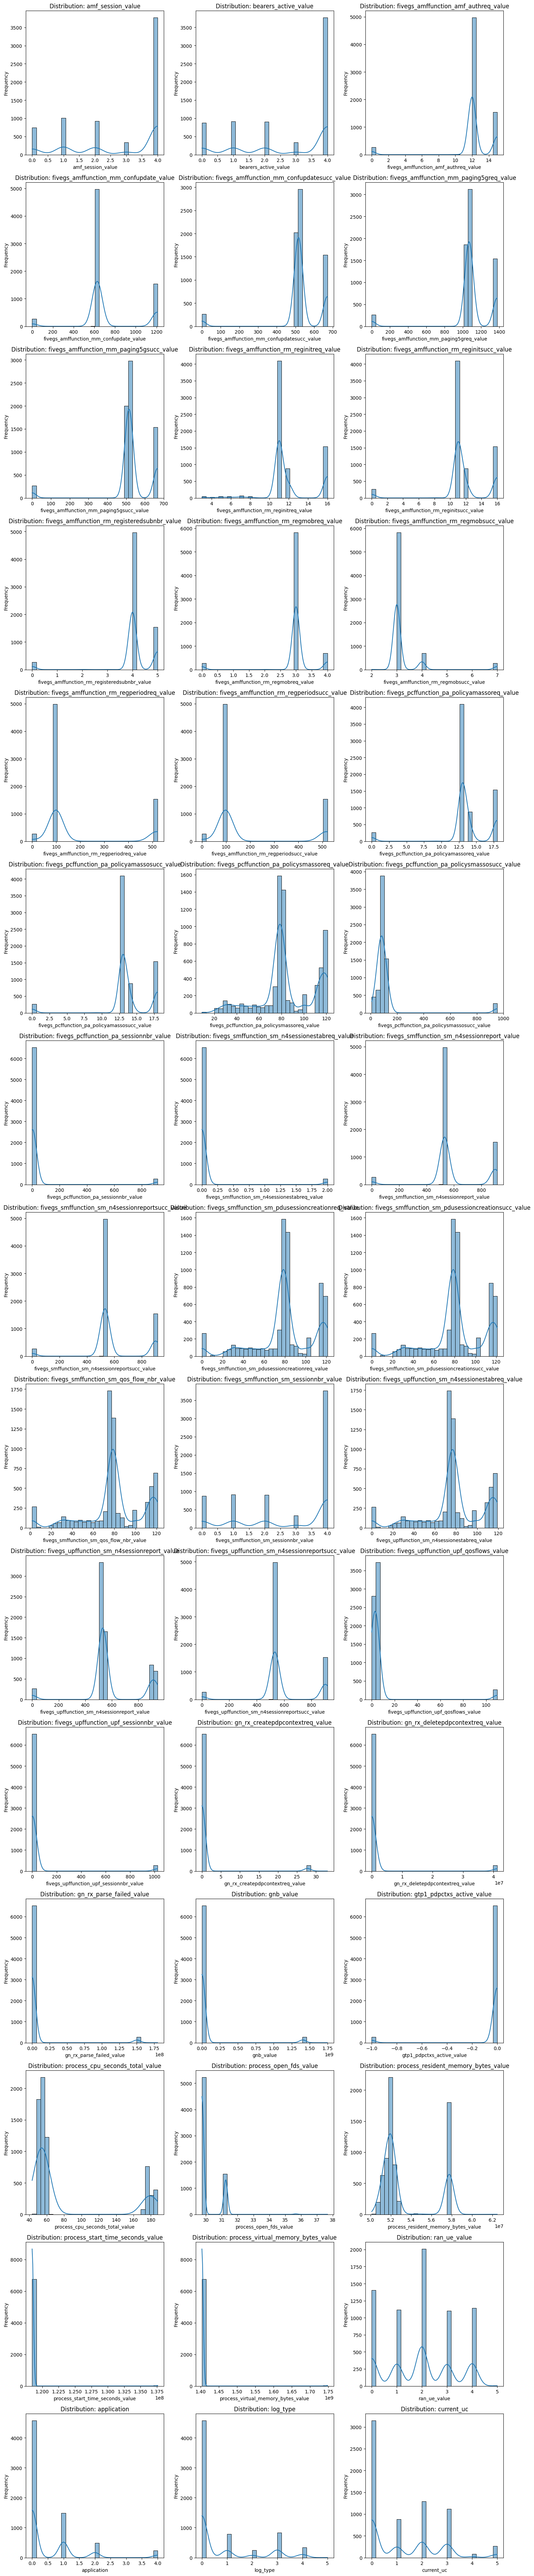

In [151]:
# Select only numerical columns for feature selection
numerical_cols = real_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
  # Histogram
  sns.histplot(real_data[col], kde=True, bins=30, ax=axes[i])
  axes[i].set_title(f'Distribution: {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

# Remove empty axes
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

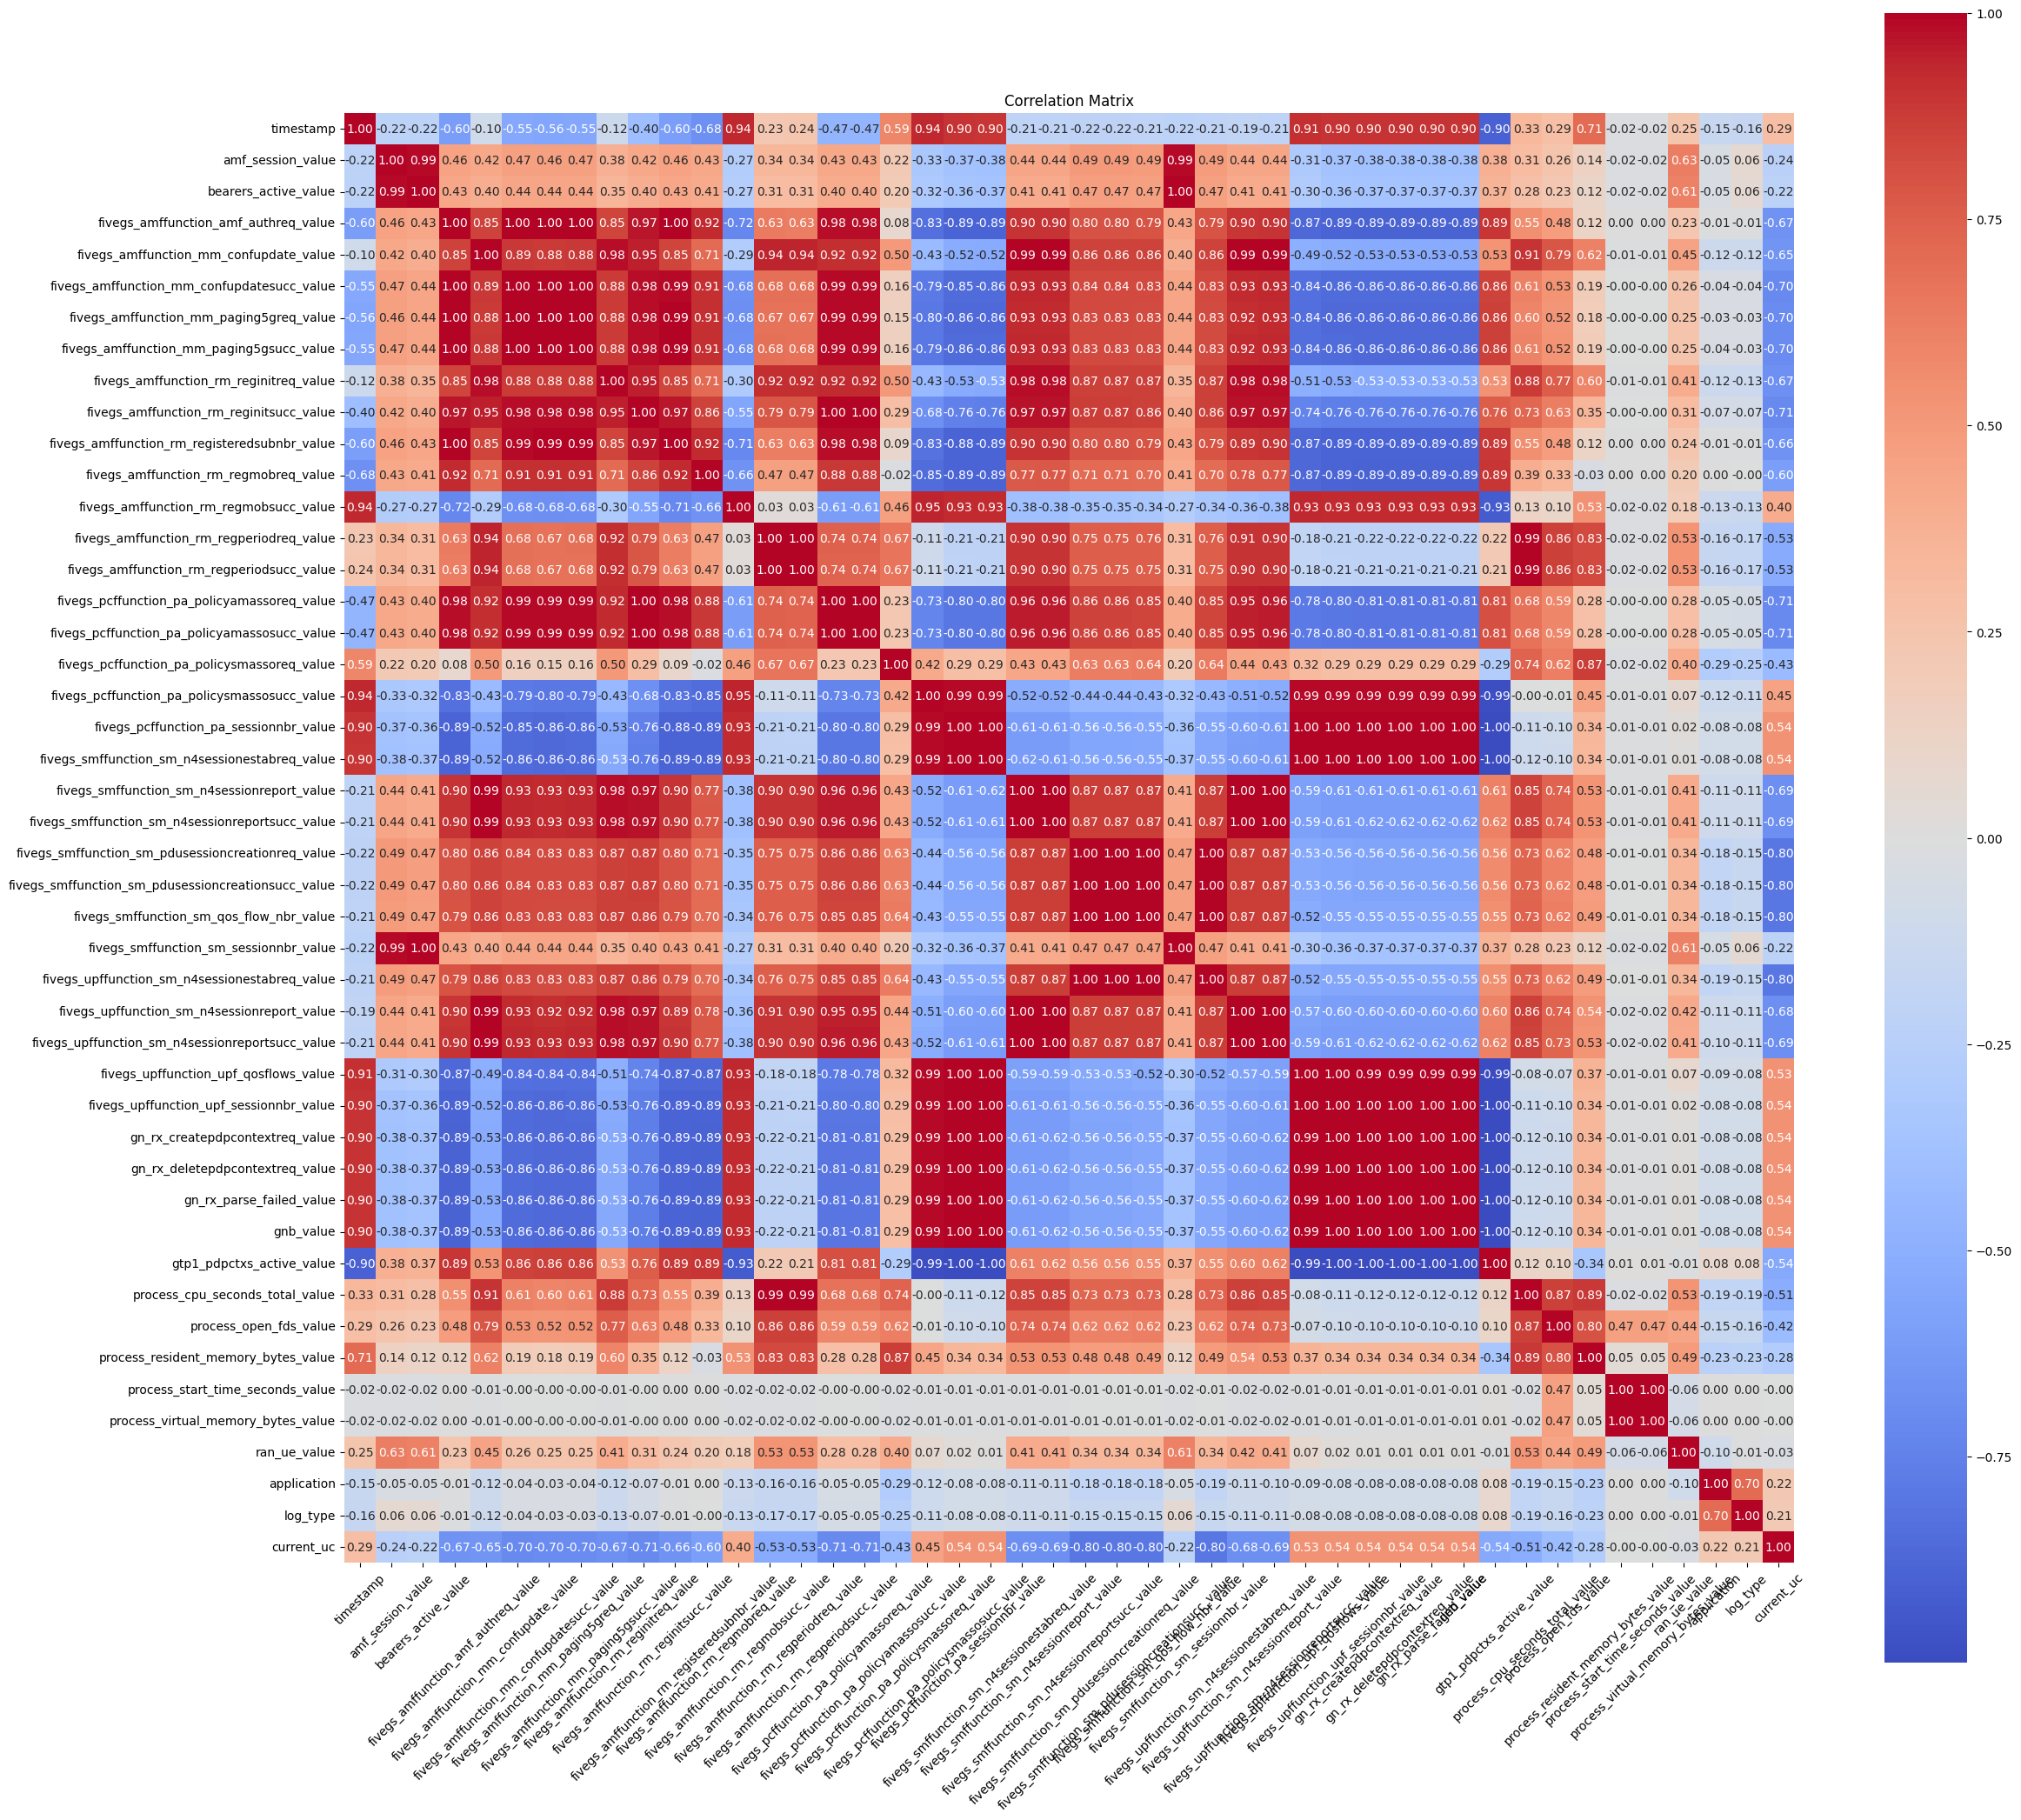

In [152]:
# Correlation matrix
corr = real_data.corr()

plt.figure(figsize=(25, 25))
plt.title("Correlation Matrix")

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Korelácia:</b> Narozdiel od syntetických dát, v reálnych dátach je silná korelácia medzi niektorými metrikami a UC triedou.
</div>

## Výber metrík <a class="anchor" id="feature_selecion"></a>

In [153]:
data = pd.read_csv("../datasets/simulated_network_data.csv")
real_data = pd.read_csv("../datasets/real_network_data_after_labeling.csv")

In [154]:
def preprocess_data(data):

    """
    Preprocess the input DataFrame: handle missing values, map categorical variables,
    select numerical features, and normalize the dataset.
    """
    
    data.fillna(data.mode().iloc[0], inplace=True)

    data['application'] = data['application'].map(APP_MAP)
    data['log_type'] = data['log_type'].map(LOG_MAP)
    data['current_uc'] = data['current_uc'].map(UC_MAP)

    # Numerical columns
    X = data.drop(columns=['timestamp', 'current_uc'], errors='ignore')
    X = X.select_dtypes(include=[np.number])
    y = data['current_uc'].astype(int)

    # Data scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, X, y

In [155]:
def base_estimator(X_scaled, X, y):

    """Fit a Random Forest model and calculate feature importances."""

    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    
    # Fit the model
    rf.fit(X_scaled, y)
    rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

    return rf_importances, rf

In [156]:
def RFE_def(X_scaled, y, X, rf):
    
    """Apply Recursive Feature Elimination (RFE) for feature selection."""
    
    rfe = RFE(estimator=rf, n_features_to_select=10)
    rfe.fit(X_scaled, y)
    rfe_selected = pd.Series(rfe.support_, index=X.columns)

    return rfe_selected

In [157]:
def RFECV_def(X_scaled, y, X, rf):

  """Apply Recursive Feature Elimination with Cross-Validation (RFECV) for feature selection."""
  
  rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring='f1_weighted', n_jobs=-1)
  rfecv.fit(X_scaled, y)
  rfecv_selected = pd.Series(rfecv.support_, index=X.columns)

  return rfecv_selected

In [158]:
def SFSX_def(X_scaled, y, X, rf):
  
  """Sequential Feature Selector for feature selection."""

  sfs = SequentialFeatureSelector(rf, n_features_to_select=10, direction='forward', scoring='f1_weighted', cv=5, n_jobs=-1)
  sfs.fit(X_scaled, y)
  sfs_selected = pd.Series(sfs.get_support(), index=X.columns)

  return sfs_selected

In [159]:
X_scaled, X, y = preprocess_data(data)


rf_importances, rf = base_estimator(X_scaled, X, y)
rfe_selected = RFE_def(X_scaled, y, X, rf)
rfecv_selected = RFECV_def(X_scaled, y, X, rf)
sfs_selected = SFSX_def(X_scaled, y, X, rf)

summary_df = pd.DataFrame({
    'Feature': X.columns,
    'RF_Importance': rf_importances,
    'Selected_RFE': rfe_selected,
    'Selected_RFECV': rfecv_selected,
    'Selected_SFS': sfs_selected
}).sort_values(by='RF_Importance', ascending=False)

summary_df

Feature  \
process_cpu_seconds_total_value                                                process_open_fds_value   
ran_ue_value                                                                s5c_rx_parse_failed_value   
fivegs_amffunction_rm_reginitreq_value                        fivegs_amffunction_rm_reginitsucc_value   
process_resident_memory_bytes_value                                process_virtual_memory_bytes_value   
fivegs_upffunction_sm_n4sessionestabreq_value             fivegs_upffunction_sm_n4sessionreport_value   
fivegs_amffunction_rm_reginitsucc_value                  fivegs_amffunction_rm_registeredsubnbr_value   
fivegs_amffunction_amf_authreq_value                           fivegs_amffunction_mm_confupdate_value   
fivegs_pcffunction_pa_policyamassoreq_value              fivegs_pcffunction_pa_policyamassosucc_value   
fivegs_amffunction_mm_confupdate_value                     fivegs_amffunction_mm_confupdatesucc_value   
process_start_time_seconds_value                               process_virtual_memory_max_bytes_value   
fivegs_pcffunction_pa_policysmassoreq_value              fivegs_pcffunction_pa_policysmassosucc_value   
fivegs_smffunction_sm_pdusessioncreationreq_value   fivegs_smffunction_sm_pdusessioncreationsucc_v...   
fivegs_pcffunction_pa_policyamassosucc_value              fivegs_pcffunction_pa_policysmassoreq_value   
fivegs_smffunction_sm_pdusessioncreationsucc_value           fivegs_smffunction_sm_qos_flow_nbr_value   
fivegs_pcffunction_pa_policysmassosucc_value                   fivegs_pcffunction_pa_sessionnbr_value   
fivegs_smffunction_sm_qos_flow_nbr_value                       fivegs_smffunction_sm_sessionnbr_value   
application                                                                      bearers_active_value   
log_type                                                                        process_max_fds_value   
process_open_fds_value                                               process_start_time_seconds_value   
process_virtual_memory_bytes_value                                                       ran_ue_value   
bearers_active_value                                          fivegs_amffunction_amf_authreject_value   
fivegs_pcffunction_pa_sessionnbr_value                  fivegs_smffunction_sm_n4sessionestabreq_value   
fivegs_smffunction_sm_sessionnbr_value                  fivegs_upffunction_sm_n4sessionestabreq_value   
fivegs_upffunction_upf_sessionnbr_value                               gn_rx_createpdpcontextreq_value   
fivegs_amffunction_rm_registeredsubnbr_value                    fivegs_amffunction_rm_regmobreq_value   
fivegs_upffunction_upf_qosflows_value                         fivegs_upffunction_upf_sessionnbr_value   
amf_session_value                                                                   amf_session_value   
fivegs_smffunction_sm_n4sessionreportsucc_value     fivegs_smffunction_sm_pdusessioncreationreq_value   
gtp2_sessions_active_value                                                  gtp_new_node_failed_value   
s5c_rx_createsession_value                                                                application   
fivegs_amffunction_amf_authreject_value                          fivegs_amffunction_amf_authreq_value   
process_virtual_memory_max_bytes_value                                     s5c_rx_createsession_value   
fivegs_amffunction_mm_confupdatesucc_value                    fivegs_amffunction_mm_paging5greq_value   
fivegs_amffunction_mm_paging5greq_value                      fivegs_amffunction_mm_paging5gsucc_value   
fivegs_amffunction_mm_paging5gsucc_value                      fivegs_amffunction_rm_regemergreq_value   
fivegs_amffunction_rm_regemergreq_value                      fivegs_amffunction_rm_regemergsucc_value   
process_max_fds_value                                             process_resident_memory_bytes_value   
fivegs_amffunction_rm_regemergsucc_value                       fivegs_amffunction_rm_reginitreq_value   

In [160]:
X_scaled_real, X_real, y_real = preprocess_data(real_data)

rf_importances_real, rf_real = base_estimator(X_scaled_real, X_real, y_real)
rfe_selected_real = RFE_def(X_scaled_real, y_real, X_real, rf_real)
rfecv_selected_real = RFECV_def(X_scaled_real, y_real, X_real, rf_real)
sfs_selected_real = SFSX_def(X_scaled_real, y_real, X_real, rf_real)

summary_real_df = pd.DataFrame({
    'Feature': X_real.columns,
    'RF_Importance': rf_importances_real,
    'Selected_RFE': rfe_selected_real,
    'Selected_RFECV': rfecv_selected_real,
    'Selected_SFS': sfs_selected_real
}).sort_values(by='RF_Importance', ascending=False)

summary_real_df

Feature  \
process_resident_memory_bytes_value                                process_virtual_memory_bytes_value   
process_cpu_seconds_total_value                                                process_open_fds_value   
fivegs_smffunction_sm_pdusessioncreationreq_value   fivegs_smffunction_sm_pdusessioncreationsucc_v...   
fivegs_smffunction_sm_n4sessionreportsucc_value     fivegs_smffunction_sm_pdusessioncreationreq_value   
fivegs_smffunction_sm_pdusessioncreationsucc_value           fivegs_smffunction_sm_qos_flow_nbr_value   
fivegs_pcffunction_pa_policysmassosucc_value                   fivegs_pcffunction_pa_sessionnbr_value   
fivegs_pcffunction_pa_policysmassoreq_value              fivegs_pcffunction_pa_policysmassosucc_value   
fivegs_amffunction_mm_paging5gsucc_value                      fivegs_amffunction_rm_regemergreq_value   
fivegs_smffunction_sm_n4sessionreport_value           fivegs_smffunction_sm_n4sessionreportsucc_value   
fivegs_smffunction_sm_qos_flow_nbr_value                       fivegs_smffunction_sm_sessionnbr_value   
fivegs_upffunction_sm_n4sessionreportsucc_value                 fivegs_upffunction_upf_qosflows_value   
fivegs_amffunction_mm_confupdatesucc_value                    fivegs_amffunction_mm_paging5greq_value   
fivegs_upffunction_sm_n4sessionestabreq_value             fivegs_upffunction_sm_n4sessionreport_value   
fivegs_upffunction_upf_sessionnbr_value                               gn_rx_createpdpcontextreq_value   
fivegs_upffunction_upf_qosflows_value                         fivegs_upffunction_upf_sessionnbr_value   
fivegs_upffunction_sm_n4sessionreport_value           fivegs_upffunction_sm_n4sessionreportsucc_value   
fivegs_amffunction_mm_confupdate_value                     fivegs_amffunction_mm_confupdatesucc_value   
fivegs_pcffunction_pa_sessionnbr_value                  fivegs_smffunction_sm_n4sessionestabreq_value   
fivegs_amffunction_rm_reginitsucc_value                  fivegs_amffunction_rm_registeredsubnbr_value   
fivegs_pcffunction_pa_policyamassosucc_value              fivegs_pcffunction_pa_policysmassoreq_value   
amf_session_value                                                                   amf_session_value   
bearers_active_value                                          fivegs_amffunction_amf_authreject_value   
fivegs_amffunction_mm_paging5greq_value                      fivegs_amffunction_mm_paging5gsucc_value   
fivegs_smffunction_sm_sessionnbr_value                  fivegs_upffunction_sm_n4sessionestabreq_value   
fivegs_amffunction_rm_reginitreq_value                        fivegs_amffunction_rm_reginitsucc_value   
fivegs_pcffunction_pa_policyamassoreq_value              fivegs_pcffunction_pa_policyamassosucc_value   
ran_ue_value                                                                s5c_rx_parse_failed_value   
fivegs_amffunction_rm_registeredsubnbr_value                    fivegs_amffunction_rm_regmobreq_value   
fivegs_amffunction_amf_authreq_value                           fivegs_amffunction_mm_confupdate_value   
fivegs_amffunction_rm_regmobreq_value                          fivegs_amffunction_rm_regmobsucc_value   
fivegs_amffunction_rm_regmobsucc_value                       fivegs_amffunction_rm_regperiodreq_value   
gnb_value                                                                   gtp1_pdpctxs_active_value   
log_type                                                                        process_max_fds_value   
application                                                                      bearers_active_value   
fivegs_amffunction_rm_regperiodreq_value                    fivegs_amffunction_rm_regperiodsucc_value   
gn_rx_parse_failed_value                                                                    gnb_value   
gn_rx_createpdpcontextreq_value                                       gn_rx_deletepdpcontextreq_value   
fivegs_smffunction_sm_n4sessionestabreq_value             fivegs_smffunction_sm_n4sessionreport_value   

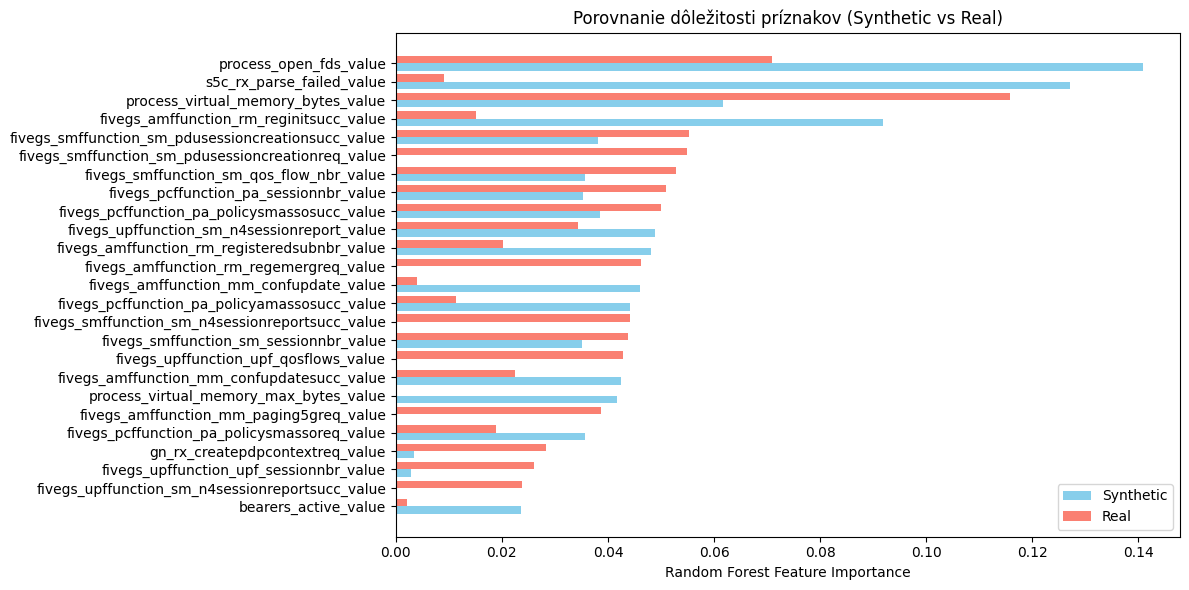

In [161]:
# Load the RF importances for synthetic and real data
rf_synth = summary_df[['Feature', 'RF_Importance']]
rf_real = summary_real_df[['Feature', 'RF_Importance']] 

# Rename columns for synthetic and real data
rf_synth = rf_synth.rename(columns={'RF_Importance': 'Importance_Synthetic'})
rf_real = rf_real.rename(columns={'RF_Importance': 'Importance_Real'})

# Merge the two DataFrames on 'Feature'
merged = pd.merge(rf_synth, rf_real, on='Feature', how='inner')

# Select the top N features based on the maximum importance from both datasets
top_n = 25
merged['Combined'] = merged[['Importance_Synthetic', 'Importance_Real']].max(axis=1)
top_features = merged.sort_values(by='Combined', ascending=False).head(top_n)

# Graphical representation of the feature importances
plt.figure(figsize=(12, 6))
bar_width = 0.4
indices = range(len(top_features))

plt.barh([i + bar_width for i in indices], top_features['Importance_Synthetic'], height=bar_width, label='Synthetic', color='skyblue')
plt.barh(indices, top_features['Importance_Real'], height=bar_width, label='Real', color='salmon')

plt.yticks([i + bar_width/2 for i in indices], top_features['Feature'])
plt.xlabel('Random Forest Feature Importance')
plt.title('Porovnanie dôležitosti príznakov (Synthetic vs Real)')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [162]:
comparison_df = pd.DataFrame({
    'Feature': [top_features['Feature'].iloc[i] for i in range(len(top_features))],
    'RF_Synthetic': summary_df['RF_Importance'].head(25).tolist(),
    'RF_Real': summary_real_df['RF_Importance'].head(25).tolist(),
})

# Thresholds for feature selection
real_thresh = 0.03
synthetic_thresh = 0.01

# Select features based on the thresholds
selected_features = comparison_df[
    (comparison_df['RF_Real'] >= real_thresh) &
    (comparison_df['RF_Synthetic'] >= synthetic_thresh)
]['Feature'].tolist()

selected_features

['process_open_fds_value',
 's5c_rx_parse_failed_value',
 'process_virtual_memory_bytes_value',
 'fivegs_amffunction_rm_reginitsucc_value',
 'fivegs_smffunction_sm_pdusessioncreationsucc_value',
 'fivegs_smffunction_sm_pdusessioncreationreq_value',
 'fivegs_smffunction_sm_qos_flow_nbr_value',
 'fivegs_pcffunction_pa_sessionnbr_value',
 'fivegs_pcffunction_pa_policysmassosucc_value',
 'fivegs_upffunction_sm_n4sessionreport_value',
 'fivegs_amffunction_rm_registeredsubnbr_value',
 'fivegs_amffunction_rm_regemergreq_value',
 'fivegs_amffunction_mm_confupdate_value']

In [163]:
# Check if selected features will pass the RFE, RFECV, and SFS test (at least 2/3)
after_test_selected = selected_features.copy()
after_test_selected = [
    feature for feature in selected_features 
    if sum([
        summary_df.set_index('Feature').at[feature, 'Selected_RFE'],
        summary_df.set_index('Feature').at[feature, 'Selected_RFECV'],
        summary_df.set_index('Feature').at[feature, 'Selected_SFS']
    ]) >= 1
]
selected_features = after_test_selected
selected_features

['process_open_fds_value',
 's5c_rx_parse_failed_value',
 'process_virtual_memory_bytes_value',
 'fivegs_amffunction_rm_reginitsucc_value',
 'fivegs_smffunction_sm_pdusessioncreationsucc_value',
 'fivegs_smffunction_sm_qos_flow_nbr_value',
 'fivegs_pcffunction_pa_sessionnbr_value',
 'fivegs_pcffunction_pa_policysmassosucc_value',
 'fivegs_upffunction_sm_n4sessionreport_value',
 'fivegs_amffunction_rm_registeredsubnbr_value',
 'fivegs_amffunction_rm_regemergreq_value',
 'fivegs_amffunction_mm_confupdate_value']

<div class="alert alert-block alert-success">
<b>Vybrané metriky:</b> Metriky, ktoré spĺňajú podmienky pre výber metrík z reálnych dát a syntetických dát.
</div>

<div class="alert alert-block alert-info">
<b>Vybrané metriky:</b> Výber metrík bol vykonaný pomocou skóre dôležitosti Random Forest na syntetických a reálnych datasetoch 5G siete. Metriky boli ponechané iba v prípade, že mali dôležitosť ≥ 0.03 v reálnych dátach (čo naznačuje relevantnosť v reálnom svete) a ≥ 0.01 v syntetických dátach (zabezpečenie aspoň minimálnej generalizácie počas tréningu). Tento dvojitý prahový prístup zmierňuje posun domény, pričom uprednostňuje signály z reálneho sveta a zároveň zachováva kompatibilitu so syntetickým tréningovým prostredím.
</div>

In [165]:
def permut_imp(data, selected_features, label, visualize=False):

    """Calculate Permutation Importance for given features."""

    try:
        X = data[selected_features]
        y = data['current_uc']
        X_scaled = StandardScaler().fit_transform(X)

        model = RandomForestClassifier(n_estimators=100, random_state=32)
        model.fit(X_scaled, y)

        result = permutation_importance(model, X_scaled, y, n_repeats=5, random_state=32)

        importance_df = pd.DataFrame({
            'Feature': selected_features,
            f'Permutation_Importance_{label}': result.importances_mean
        }).sort_values(by=f'Permutation_Importance_{label}', ascending=False)

        # Visualize the results
        if visualize:
            plt.figure(figsize=(10, 6))
            plt.barh(importance_df['Feature'], importance_df[f'Permutation_Importance_{label}'], color='skyblue')
            plt.xlabel("Permutation Importance")
            plt.title(f"Permutation Importance ({label})")
            plt.gca().invert_yaxis()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        return importance_df

    except Exception as e:
        print(f"❌ Error in permut_imp for {label}: {e}")
        return pd.DataFrame()


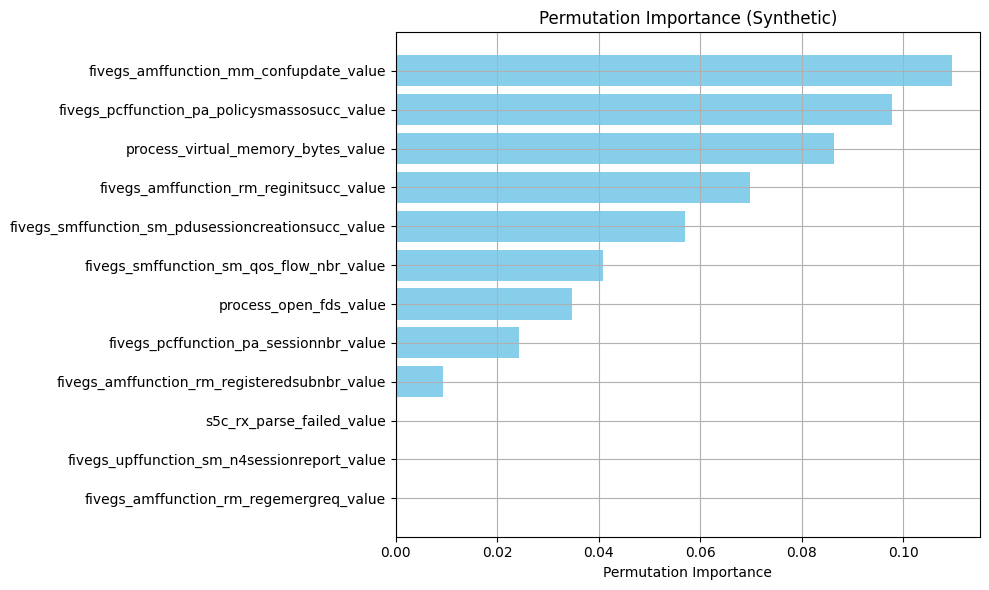

Feature  \
11             fivegs_amffunction_mm_confupdate_value   
7        fivegs_pcffunction_pa_policysmassosucc_value   
2                  process_virtual_memory_bytes_value   
3             fivegs_amffunction_rm_reginitsucc_value   
4   fivegs_smffunction_sm_pdusessioncreationsucc_v...   
5            fivegs_smffunction_sm_qos_flow_nbr_value   
0                              process_open_fds_value   
6              fivegs_pcffunction_pa_sessionnbr_value   
9        fivegs_amffunction_rm_registeredsubnbr_value   
1                           s5c_rx_parse_failed_value   
8         fivegs_upffunction_sm_n4sessionreport_value   
10            fivegs_amffunction_rm_regemergreq_value   

    Permutation_Importance_Synthetic  
11                          0.109630  
7                           0.097833  
2                           0.086315  
3                           0.069795  
4                           0.056893  
5                           0.040753  
0                           0.034742  
6                           0.024210  
9                           0.009258  
1                           0.000000  
8                           0.000000  
10                          0.000000

In [166]:
permut_imp(data, selected_features, "Synthetic", True)

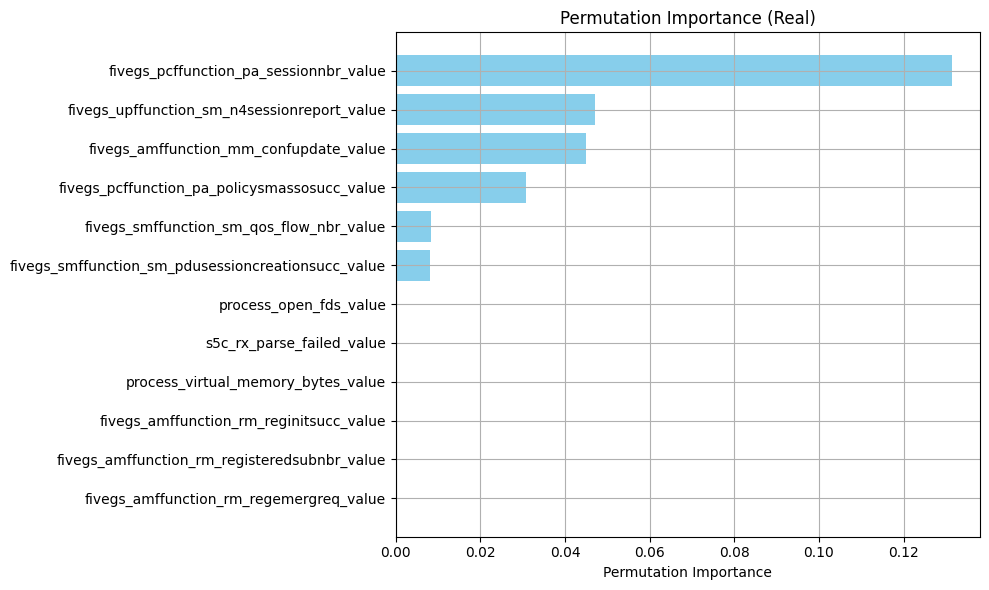

Feature  \
6              fivegs_pcffunction_pa_sessionnbr_value   
8         fivegs_upffunction_sm_n4sessionreport_value   
11             fivegs_amffunction_mm_confupdate_value   
7        fivegs_pcffunction_pa_policysmassosucc_value   
5            fivegs_smffunction_sm_qos_flow_nbr_value   
4   fivegs_smffunction_sm_pdusessioncreationsucc_v...   
0                              process_open_fds_value   
1                           s5c_rx_parse_failed_value   
2                  process_virtual_memory_bytes_value   
3             fivegs_amffunction_rm_reginitsucc_value   
9        fivegs_amffunction_rm_registeredsubnbr_value   
10            fivegs_amffunction_rm_regemergreq_value   

    Permutation_Importance_Real  
6                      0.131496  
8                      0.046986  
11                     0.044952  
7                      0.030685  
5                      0.008342  
4                      0.007959  
0                      0.000000  
1                      0.000000  
2                      0.000000  
3                      0.000000  
9                      0.000000  
10                     0.000000

In [167]:
permut_imp(real_data, selected_features, "Real", True)

<div class="alert alert-block alert-info">
<b>Permutation Importance (Real Data):</b> Permutačná importance odhaľuje reálne silné znaky, ktoré môžu byť v syntetických dátach slabo zastúpené alebo chýbať.<br>
- fivegs_upffunction_sm_n4sessionreport_value má najvyššiu permutačnú dôležitosť, hoci v syntetických dátach nemal žiaden význam – signalizuje možný bias syntetického datasetu.<br>
- process_virtual_memory_bytes_value, ktorý bol vysoko v syntetike, má nulový prínos v realite.<br>
- Prvky ako fivegs_pcffunction_pa_sessionnbr_value alebo fivegs_pcffunction_pa_policysmassosucc_value sa objavili v oboch dátach – potvrdzujú svoju robustnosť naprieč doménami.
</div>


In [169]:
synthetic_perm = permut_imp(data, selected_features, "Synthetic")
real_perm = permut_imp(real_data, selected_features, "Real")

# Check if the permutation importance tables are empty
if synthetic_perm.empty or real_perm.empty:
    raise ValueError("❗ One of the permutation importance tables is empty. Check selected_features or data.")

merged = pd.merge(synthetic_perm, real_perm, on='Feature', how='inner')
merged = merged.merge(summary_df[['Feature', 'RF_Importance']], on='Feature', how='left')
merged = merged.rename(columns={'RF_Importance': 'RF_Importance_Synthetic'})
merged = merged.merge(summary_real_df[['Feature', 'RF_Importance']], on='Feature', how='left')
merged = merged.rename(columns={'RF_Importance': 'RF_Importance_Real'})

final_features = merged[
    (merged['Permutation_Importance_Real'] >= 0.001)
].sort_values(by='Permutation_Importance_Real', ascending=False)

final_features = final_features['Feature'].tolist()

# Add the log_type and application columns
new_features = ['log_type', 'application']
final_features = final_features + new_features

output = {"features": final_features}

with open('selected_features.json', 'w') as f:
    json.dump(output, f)

output

{'features': ['fivegs_pcffunction_pa_sessionnbr_value',
  'fivegs_upffunction_sm_n4sessionreport_value',
  'fivegs_amffunction_mm_confupdate_value',
  'fivegs_pcffunction_pa_policysmassosucc_value',
  'fivegs_smffunction_sm_qos_flow_nbr_value',
  'fivegs_smffunction_sm_pdusessioncreationsucc_value',
  'log_type',
  'application']}

In [170]:
synthetic_perm = permut_imp(data, selected_features, "Synthetic")
real_perm = permut_imp(real_data, selected_features, "Real")

# Check if the permutation importance tables are empty
if synthetic_perm.empty or real_perm.empty:
    raise ValueError("❗ One of the permutation importance tables is empty. Check selected_features or data.")

merged = pd.merge(synthetic_perm, real_perm, on='Feature', how='inner')
merged = merged.merge(summary_df[['Feature', 'RF_Importance']], on='Feature', how='left')
merged = merged.rename(columns={'RF_Importance': 'RF_Importance_Synthetic'})
merged = merged.merge(summary_real_df[['Feature', 'RF_Importance']], on='Feature', how='left')
merged = merged.rename(columns={'RF_Importance': 'RF_Importance_Real'})

final_features = merged[
    (merged['Permutation_Importance_Real'] >= 0.001)
].sort_values(by='Permutation_Importance_Real', ascending=False)

final_features = final_features['Feature'].tolist()

# Add the log_type and application columns
new_features = ['log_type', 'application']
final_features = final_features + new_features

output = {"features": final_features}

output

{'features': ['fivegs_pcffunction_pa_sessionnbr_value',
  'fivegs_upffunction_sm_n4sessionreport_value',
  'fivegs_amffunction_mm_confupdate_value',
  'fivegs_pcffunction_pa_policysmassosucc_value',
  'fivegs_smffunction_sm_qos_flow_nbr_value',
  'fivegs_smffunction_sm_pdusessioncreationsucc_value',
  'log_type',
  'application']}

In [171]:
def permut_imp_stability(data, selected_features, label, n_runs=10):

    """Calculate the stability of Permutation Importance across multiple runs."""

    X = data[selected_features]
    y = data['current_uc']
    X_scaled = StandardScaler().fit_transform(X)

    importances = []

    for i in range(n_runs):
        model = RandomForestClassifier(n_estimators=100, random_state=i)
        model.fit(X_scaled, y)
        result = permutation_importance(model, X_scaled, y, n_repeats=5, random_state=i)
        importances.append(result.importances_mean)

    importances = np.array(importances)
    mean_importance = np.mean(importances, axis=0)
    std_importance = np.std(importances, axis=0)
    median_importance = np.median(importances, axis=0)

    stability_df = pd.DataFrame({
        'Feature': selected_features,
        f'PI_Mean_{label}': mean_importance,
        f'PI_Std_{label}': std_importance,
        f'PI_Median_{label}': median_importance
    }).sort_values(by=f'PI_Median_{label}', ascending=False)

    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.barh(stability_df['Feature'], stability_df[f'PI_Median_{label}'],
             xerr=stability_df[f'PI_Std_{label}'], color='skyblue')
    plt.xlabel("Median Permutation Importance (± std)")
    plt.title(f"Permutation Importance Stability ({label}) across {n_runs} runs")
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return stability_df


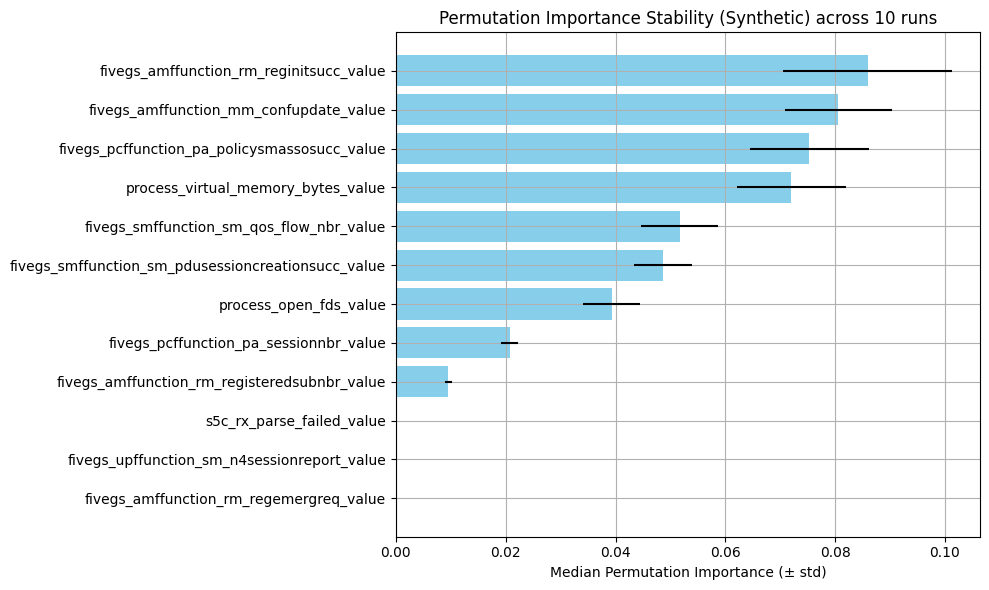

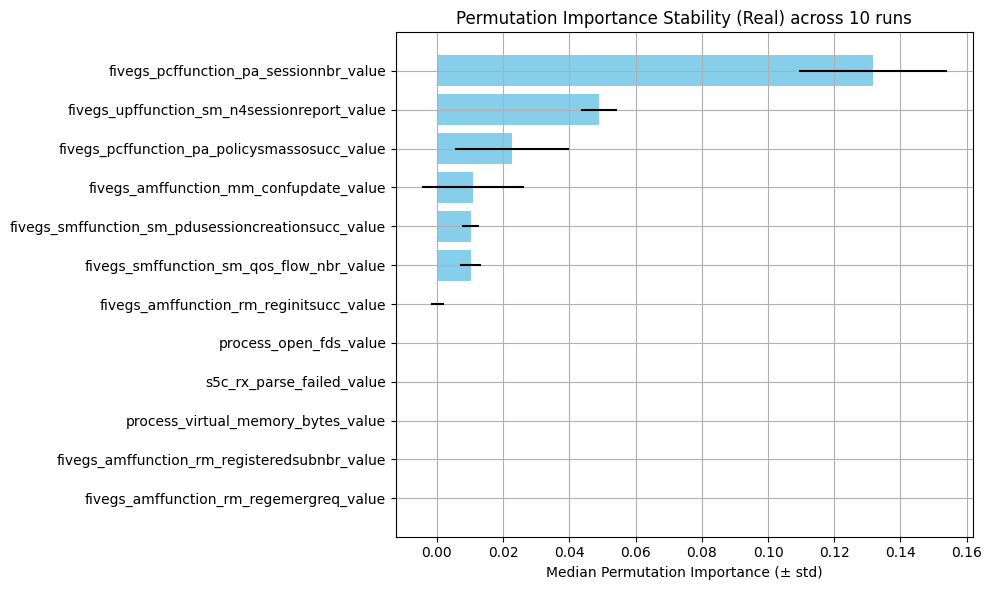

In [172]:
stability_synthetic = permut_imp_stability(data, selected_features, "Synthetic")
stability_real = permut_imp_stability(real_data, selected_features, "Real")

In [173]:
print(stability_synthetic)
print(stability_real)

                                              Feature  PI_Mean_Synthetic  \
3             fivegs_amffunction_rm_reginitsucc_value           0.089895   
11             fivegs_amffunction_mm_confupdate_value           0.080016   
7        fivegs_pcffunction_pa_policysmassosucc_value           0.076676   
2                  process_virtual_memory_bytes_value           0.071801   
5            fivegs_smffunction_sm_qos_flow_nbr_value           0.050805   
4   fivegs_smffunction_sm_pdusessioncreationsucc_v...           0.049039   
0                              process_open_fds_value           0.037172   
6              fivegs_pcffunction_pa_sessionnbr_value           0.020860   
9        fivegs_amffunction_rm_registeredsubnbr_value           0.009667   
1                           s5c_rx_parse_failed_value           0.000000   
8         fivegs_upffunction_sm_n4sessionreport_value           0.000000   
10            fivegs_amffunction_rm_regemergreq_value           0.000000   

    PI_Std_

In [175]:
# Check if the permutation importance tables are empty
if stability_synthetic.empty or stability_real.empty:
    raise ValueError("❗ One of the permutation importance tables is empty. Check selected_features or data.")

merged_stability = pd.merge(stability_synthetic, stability_real, on='Feature', how='inner')
merged_stability = merged_stability.merge(summary_df[['Feature', 'RF_Importance']], on='Feature', how='left')
merged_stability = merged_stability.rename(columns={'RF_Importance': 'RF_Importance_Synthetic'})
merged_stability = merged_stability.merge(summary_real_df[['Feature', 'RF_Importance']], on='Feature', how='left')
merged_stability = merged_stability.rename(columns={'RF_Importance': 'RF_Importance_Real'})
merged_stability = merged_stability.rename(columns={
    'PI_Mean_Synthetic': 'PI_Mean_Synthetic',
    'PI_Std_Synthetic': 'PI_Std_Synthetic',
    'PI_Median_Synthetic': 'PI_Median_Synthetic',
    'PI_Mean_Real': 'PI_Mean_Real',
    'PI_Std_Real': 'PI_Std_Real',
    'PI_Median_Real': 'PI_Median_Real'
})

final_features_stability = merged_stability[
    (merged_stability['PI_Median_Real'] >= 0.001)
].sort_values(by='PI_Median_Real', ascending=False)
final_features_stability = final_features_stability['Feature'].tolist()

# Add the log_type and application columns
new_features = ['log_type', 'application']

final_features_stability = final_features_stability + new_features

output_stability = {"features": final_features_stability}
with open('./json/selected_features.json', 'w') as f:
    json.dump(output, f)

output_stability

{'features': ['fivegs_pcffunction_pa_sessionnbr_value',
  'fivegs_upffunction_sm_n4sessionreport_value',
  'fivegs_pcffunction_pa_policysmassosucc_value',
  'fivegs_amffunction_mm_confupdate_value',
  'fivegs_smffunction_sm_pdusessioncreationsucc_value',
  'fivegs_smffunction_sm_qos_flow_nbr_value',
  'log_type',
  'application']}

<div class="alert alert-success">
<b>Finálny výber znakov (cross-domain validovaný):</b> Na základe kombinácie Random Forest a Permutation Importance v syntetických aj reálnych dátach sme zvolili znaky, ktoré:<br>
✔ Sú informatívne v syntetike (trénovateľné)<br>
✔ Majú reálnu dôležitosť (reálne použiteľné)<br><br>
<b>Finálny výber (8 znakov):</b><br>
fivegs_pcffunction_pa_sessionnbr_value<br>
fivegs_upffunction_sm_n4sessionreport_value<br>
fivegs_pcffunction_pa_policysmassosucc_value<br>
fivegs_amffunction_mm_confupdate_value<br>
fivegs_smffunction_sm_pdusessioncreationsucc_value<br>
fivegs_smffunction_sm_qos_flow_nbr_value<br>
log_type<br>
application<br>
Týmto výberom minimalizujeme doménový bias a maximalizujeme robustnosť pri generalizácii z trénovania na syntetike do reálneho prostredia.
</div>

<div class="alert alert-info">
<b>Finálny výber znakov (cross-domain validovaný):</b> Finálny výber znakov je založený na kombinácii permutačnej dôležitosti v syntetických a reálnych dátach. Cieľom je zabezpečiť, že výber reflektuje reálne správanie siete, ale zároveň je trénovateľný na syntetických dátach. Do finálnej množiny sme zaradili iba tie znaky, ktoré vykazovali konzistentný informačný prínos naprieč oboma doménami. Týmto prístupom sme eliminovali znaky, ktoré sú síce dominantné v syntetickom prostredí, ale nereprezentujú realitu (napr. process_virtual_memory_bytes_value), čím sa znižuje riziko doménového biasu. 
</div>

## Referencie <a class="anchor" id="Referencie"></a>

1. NGUYEN, Giang. Introduction to Data Science. 1. vyd. Bratislava: Slovak University of Technology in Bratislava, 2022. ISBN 978-80-227-5193-3.

2. Alejopaullier (2024) Make your notebooks look better. https://www.kaggle.com/code/alejopaullier/make-your-notebooks-look-better.

3. Huang, N., Lu, G. and Xu, D., 2016. A permutation importance-based feature selection method for short-term electricity load forecasting using random forest. Energies, 9(10), p.767. Available at: https://doi.org/10.3390/en9100767